# Author : Vidhi Bharadwaj

# Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Loading the dataset

In [3]:
df = pd.read_csv(r'C:\Users\bhara\AppData\Local\Programs\Python\Python38\Scripts\all_stocks_5yr.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


# Cleaning the data

In [6]:
df.drop(['Name'],axis=1,inplace=True)
df

,date,open,high,low,close,volume
0,2013-02-08,15.07,15.12,14.63,14.75,8407500
1,2013-02-11,14.89,15.01,14.26,14.46,8882000
2,2013-02-12,14.45,14.51,14.10,14.27,8126000
3,2013-02-13,14.30,14.94,14.25,14.66,10259500
4,2013-02-14,14.94,14.96,13.16,13.99,31879900
...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323


In [7]:
df.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64

<AxesSubplot:>

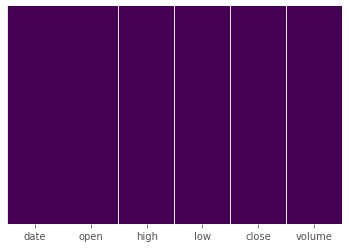

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

# Filling missing values

In [9]:
df.open.fillna(df.open.mean(),inplace=True)
df.isnull().sum()

date      0
open      0
high      8
low       8
close     0
volume    0
dtype: int64

In [10]:
df.high.fillna(value=0,inplace=True)
df.isnull().sum()

date      0
open      0
high      0
low       8
close     0
volume    0
dtype: int64

In [11]:
df.low.fillna(value=0,inplace=True)
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:xlabel='close', ylabel='Density'>

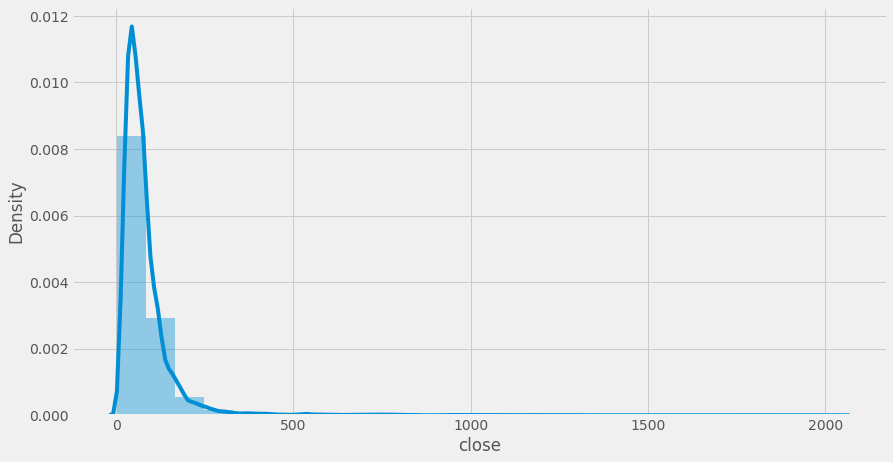

In [12]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.distplot(df['close'], bins=25)

<AxesSubplot:xlabel='date', ylabel='count'>

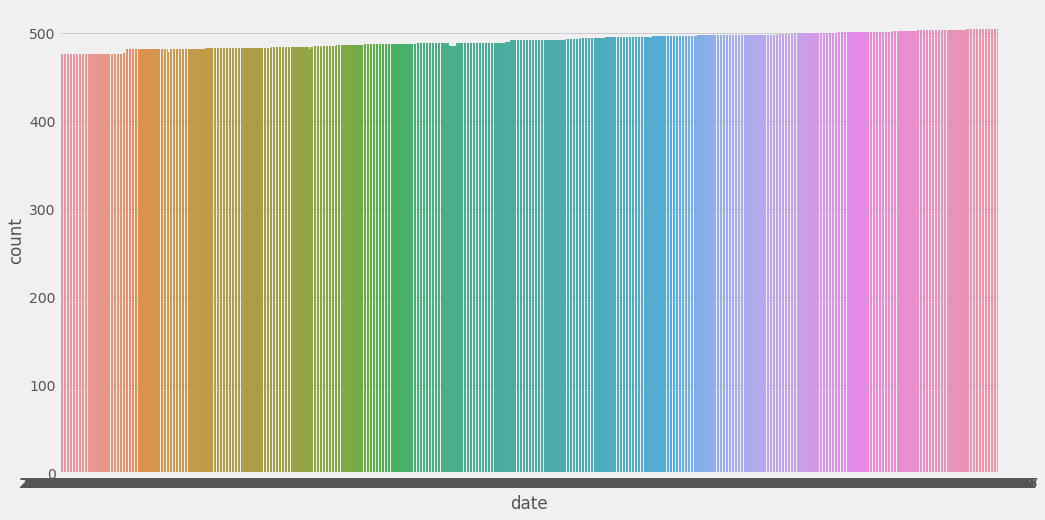

In [13]:
plt.subplots(figsize = (15,8))
sns.countplot(df['date'])

(0.0, 2151.3705)

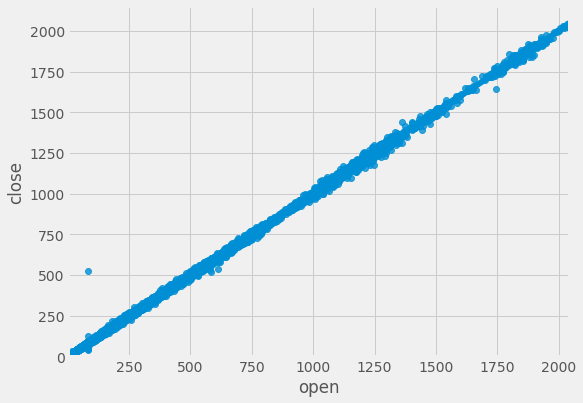

In [14]:
plt.figure(figsize=(8,6))
sns.regplot(x='open',y='close',data=df)
plt.ylim(0,)

<AxesSubplot:>

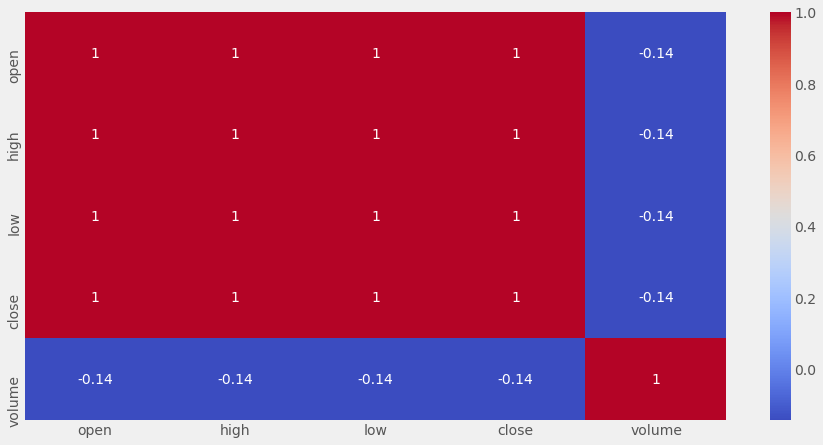

In [14]:
corr = df.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Splitting data into train and test

In [15]:
import datetime as dt
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%d.%m.%Y')
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619040 non-null  float64
 2   high    619040 non-null  float64
 3   low     619040 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   year    619040 non-null  int64  
 7   month   619040 non-null  int64  
 8   day     619040 non-null  int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 42.5+ MB
None


In [16]:
X = df.drop(columns=['close','date'])
y = df['close']
X

,open,high,low,volume,year,month,day
0,15.07,15.12,14.63,8407500,2013,8,2
1,14.89,15.01,14.26,8882000,2013,11,2
2,14.45,14.51,14.10,8126000,2013,12,2
3,14.30,14.94,14.25,10259500,2013,2,13
4,14.94,14.96,13.16,31879900,2013,2,14
...,...,...,...,...,...,...,...
619035,76.84,78.27,76.69,2982259,2018,1,2
619036,77.53,78.12,76.73,2595187,2018,2,2
619037,76.64,76.92,73.18,2962031,2018,5,2
619038,72.74,74.56,72.13,4924323,2018,6,2


# Training the model and calculating CV score

In [47]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
    model.fit(x_train, y_train)
    
    # predict the results
    pred = model.predict(x_test)
    
    # cross validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Results")
    print("MSE:", np.sqrt(mean_squared_error(y_test, pred)))
    print("CV Score:", np.sqrt(cv_score))

Results
MSE: 1.661929423317475
CV Score: 1.0647196458204593


<AxesSubplot:title={'center':'Model Coefficients'}>

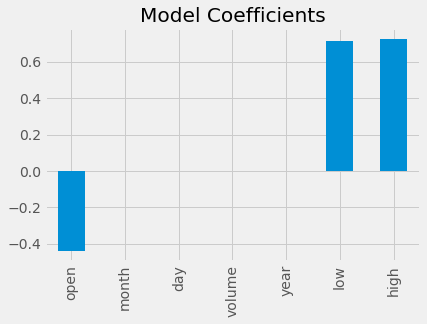

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

Results
MSE: 1.599033286800883
CV Score: 8.747859693748252


<AxesSubplot:title={'center':'Feature Importance'}>

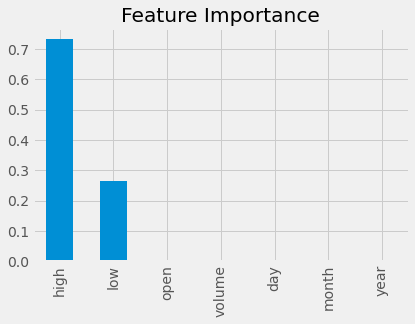

In [50]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')